# Jupyter Notebook: Temperaturvorhersage

## Daten Laden
Als erstes laden wir die Datei (jährliche Durchschnittstemperaturen) aus der Datei 'regional_averages_tm_year.txt' und geben die Titelzeile aus damit wir wissen, dass wir die korrekte Datei lesen.

<div class="alert alert-info">

**Wichtig:** Die zu lesende Datei muss sich in demselben Verzeichnis befinden wie das Jupyter Notebook!

Falls dies nicht der Fall ist muss die Datei in dasselbe Verzeichnis kopiert oder ein absoluter Pfad angegeben werden. Ein absoluter Pfad wäre zum Beispiel: 'C:/Downloads/regional_averages_tm_year.txt' anstatt 'regional_averages_tm_year.txt'.

</div>

Wir wollen wie beim letzten Mal, die Jahreszahlen und Temperaturen aus der Datei lesen. Diesmal beschränken wir uns auf die Temperatur in Berlin.

In [3]:
import csv
jahr = []
temperaturBerlin = []
with open('regional_averages_tm_year.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    titel = next(readCSV, None)  # Titel auslesen
    kopf = next(readCSV, None)  # Kopfzeile auslesen
    if kopf:
        print(kopf[1:3])
    for row in readCSV:        
        jahr.append(int(row[0]))
        temperaturBerlin.append(float(row[3]))

['Jahr', 'Brandenburg/Berlin']


Dieses Mal geben wir uns nicht mit einfachen Arrays zufrieden. Stattdessen speichern wir die Daten in einem DataFrame. Zuletzt geben wir die ersten Werte in dem DataFrame aus.

<div class="alert alert-info">

**Wichtig:** Wir benötigen die Bibliotheken pandas und numpy.
    
Falls noch nicht geschehen, führe die Befehle 'pip install pandas' und 'pip install numpy' aus.

</div>

In [21]:
import pandas as pd
import numpy as np

x = jahr
y = temperaturBerlin

df = pd.DataFrame(
    {'x': x,
     'y': y}
)

df.head()

,x,y
0,1881,7.54
1,1882,8.97
2,1883,8.41
3,1884,9.10
4,1885,8.39


## Berechne lineare Regression
Nun berechnen wir anhand der Daten x und y ein lineares Modell, dass die Vorhersage von Temperaturen ermöglicht.

### manuelle Berechnung
Wir können a und b manuell berechnen. Mithilfe von pandas und numpy funktioniert das innerhalb weniger Zeilen. Für die Berechnung benötigen wir Mittelwert, Varianz von x und Covarianz von x und y. Auf die mathematischen Einzelheiten gehen wir an dieser Stelle nicht näher ein.

In [22]:
x_mittel = np.mean(x)
y_mittel = np.mean(y)

df['xy_cov'] = (df['x'] - x_mittel) * (df['y'] - y_mittel)
df['x_var'] = (df['x'] - x_mittel)**2

b = df['xy_cov'].sum() / df['x_var'].sum()
a = y_mittel - (b * x_mittel)
print(f'a = {a}')
print(f'b = {b}')

a = -10.61641315519013
b = 0.009955806783144913


Anhand von a und b können wir nun eine Abschätzung von y berechnen.

In [23]:
y_schaetzung = b*df['x'] + a

### Ausgabe Ergebnisse
Mit matplotlib können wir die tatsächlichen Werte y und die geschätzten Werte y_schaetzung in einer Grafik darstellen.

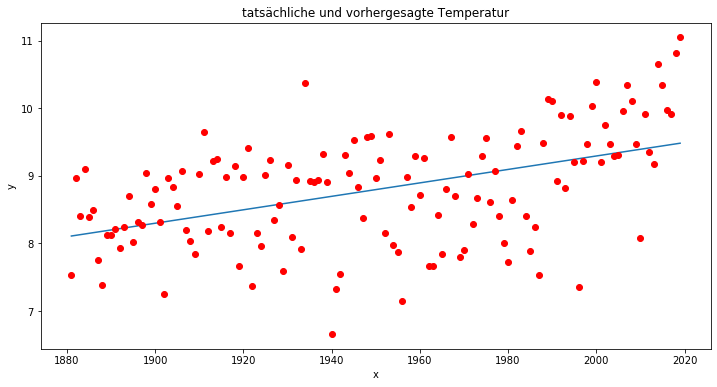

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(x, y_schaetzung) # mithilfe der linearen Regression bestimmte Gerade
plt.plot(x, y, 'ro')      # scatter plot der tatsächlichen Werte
plt.title('tatsächliche und vorhergesagte Temperatur')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Das eigentliche Grund eine Regression durchzuführen ist aber nicht die Abschätzung der bereits bekannten Werte, sondern die Vorhersage für unbekannte Stellen. Wir können die Vorhersage für das Jahr 2060 rechnerisch extrapolieren.

In [86]:
jahr_vorhersage = 2060
y_jahr_vorhersage = b*jahr_vorhersage + a
print ("Vorhersage für " + str(jahr_vorhersage) + ": " + str(y_jahr_vorhersage))

Vorhersage für 2060: 9.8631671234441


Oder wir plotten (engl. zeichnen) die Gerade bis zu dem Jahr 2075. Die Vorhersage für das Jahr 2060 können wir aus der Grafik ablesen.

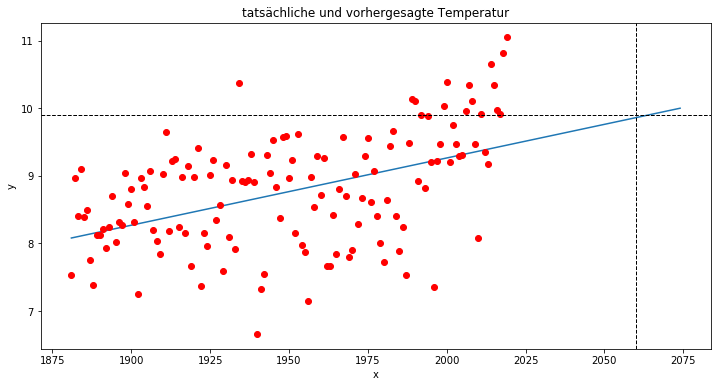

In [87]:
x_erweitert = range(1881,2075)
y_vorhersage_erweitert = b*x_erweitert + a

plt.figure(figsize=(12, 6))
plt.plot(x_erweitert, y_vorhersage_erweitert) # Gerade im erweiterten Bereich (Extrapolation)
plt.plot(x, y, 'ro')                          # scatter plot der tatsächlichen Werte
plt.axvline(2060, linewidth=1, color='k', linestyle='--')
plt.axhline(9.9, linewidth=1, color='k', linestyle='--')
plt.title('tatsächliche und vorhergesagte Temperatur')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Alernative Lösung mit Regression in 2 Bereichen

Eine Extrapolation ist mit großen Unsicherheiten verbunden. Wenn überhaupt ist dieses Vorgehen nur erlaubt, wenn ein Experte den vorhergesagten Verlauf auch außerhalb des bekannten Bereichs fachlich begründen kann. Alternative Ergebnisse für dasselben Vorgehen (lineare Regression) entstehen, wenn man einen anderen Datenbereich zugrunde legt. Unten wird der Datenbereich aufgeteilt und zwei Geraden separat bestimmt.

Vorhersage für 2060: 11.963227625088095


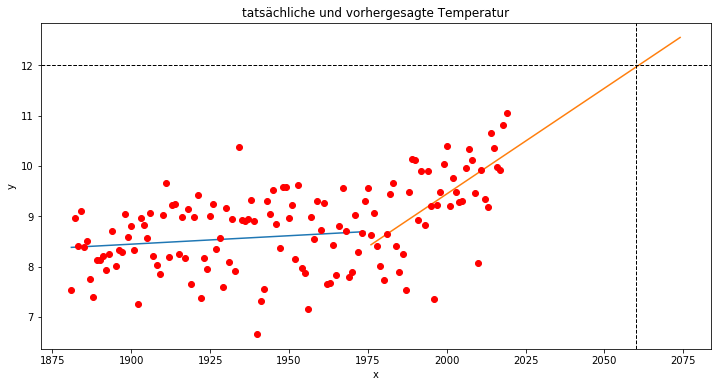

In [88]:
x_1 = x[0:94]
y_1 = y[0:94]
df_1 = pd.DataFrame(
    {'x': x_1,
     'y': y_1}
)
x_1_mittel = np.mean(x_1)
y_1_mittel = np.mean(y_1)
df_1['xy_cov'] = (df_1['x'] - x_1_mittel) * (df_1['y'] - y_1_mittel)
df_1['x_var'] = (df_1['x'] - x_1_mittel)**2
b_1 = df_1['xy_cov'].sum() / df_1['x_var'].sum()
a_1 = y_1_mittel - (b_1 * x_1_mittel)

y_1_vorhersage = b_1*df_1['x'] + a_1


x_2 = x[95:]
y_2 = y[95:]
df_2 = pd.DataFrame(
    {'x': x_2,
     'y': y_2}
)
x_2_mittel = np.mean(x_2)
y_2_mittel = np.mean(y_2)
df_2['xy_cov'] = (df_2['x'] - x_2_mittel) * (df_2['y'] - y_2_mittel)
df_2['x_var'] = (df_2['x'] - x_2_mittel)**2
b_2 = df_2['xy_cov'].sum() / df_2['x_var'].sum()
a_2 = y_2_mittel - (b_2 * x_2_mittel)

x_2_erweitert = np.arange(1976,2075)
y_2_vorhersage_erweitert = b_2*x_2_erweitert + a_2

jahr_vorhersage = 2060
y_jahr_vorhersage = b_2*jahr_vorhersage + a_2
print ("Vorhersage für " + str(jahr_vorhersage) + ": " + str(y_jahr_vorhersage))

plt.figure(figsize=(12, 6))
plt.plot(x_1, y_1_vorhersage) # Gerade im ersten Bereich
plt.plot(x_2_erweitert, y_2_vorhersage_erweitert) # Gerade im zweiten Bereich
plt.plot(x, y, 'ro')                          # scatter plot der tatsächlichen Werte
plt.axvline(2060, linewidth=1, color='k', linestyle='--')
plt.axhline(12., linewidth=1, color='k', linestyle='--')
plt.title('tatsächliche und vorhergesagte Temperatur')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Berechnung mithilfe von scikit-learn
Noch einfacher lassen sich Verfahren wie die lineare Regression mithilfe von scikit-learn durchführen. Das erfolgt in drei Schritte: 

1. Modell initialisieren
2. Modell fitten (engl. anpassen)
3. Modell auswerten

Beachte, dass auch diesmal wieder die Variablen a und b bestimmt werden. Nur tun wir dies nicht selbst. Stattdessen werden sie während dem Fitten des Modells durch die scikit-learn Bibliothek berechnet. Wir können uns a und b aber ausgeben lassen und kontrollieren ob dieselbe Werte angezeigt werden wie in unserer manuellen Berechnung oben.

<div class="alert alert-info">

**Wichtig:** Wir benötigen die Bibliothek scikit-learn.
    
Falls noch nicht geschehen, führe den Befehl 'pip install scikit-learn' aus.

</div>

<div class="alert alert-info">

**Hinweis:** Für das Fitten des Modells erwartet die scikit-learn Bibliothek eine Matrix X und einen Vektor y als Eingabe.
    
Hättest du die Funktion reshape() verwendet? Entferne das Kommentarzeichen aus den entsprechenden Zeilen und versuche was passiert, wenn du den Vektor x direkt an die fit-Funktion übergibst.
    
Das X als Matrix angegeben wird ist verständlich, da ja mehr als nur eine einzige Einflussgröße existieren kann. Sollte man dennoch den Wert x als Parameter übergeben, erhält man bei der Ausführung einen ValueError. Solche Fehler, denen eine kleine Abweichung im Datenformat zugrunde liegt sind sehr üblich und kosten den Entwickler oder Data Scientist oft viel Zeit. In diesem Fall ist die Behebung des Problems glücklicherweise direkt in der Fehlermeldung angegeben. In anderen Fällen empfiehlt es sich den Fehler zu googeln, bei einschlägigen Seite wie zum Beispiel Stakeoverflow zu suchen oder auf der Dokumentationsseite der verwendeten Bibliothek. In diesem Fall ist das: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

</div>

In [32]:
from sklearn.linear_model import LinearRegression

#x = np.array(jahr)
X = np.array(jahr).reshape(-1, 1)
y = np.array(temperaturBerlin)

# 1. Modell initialisieren
lm = LinearRegression() 

# 2. Modell fitten
#model = lm.fit(x,y)
model = lm.fit(X, y) 

print(f'a = {model.intercept_}')
print(f'b = {model.coef_}')

a = -10.61641315519013
b = [0.00995581]


Die Auswertung des Modells erfolgt mit der predict-Methode. Welche Temperatur wird für 2060 vorhergesagt? Deckt sich die Vorhersage mit unserer manuellen Berechnung beziehungsweise dem Plot?

In [21]:
# 3. Modell auswerten
model.predict([[2060]])

array([9.89254882])

## Nicht-lineare Regression
Woher wissen wir, dass eine Gerade eine gute Vorhersage ermöglicht? Alleine auf Basis der Daten wissen wir es überhaupt nicht.
Anstatt der linearen Regression gibt es noch viele weitere Möglichkeiten einen Zusammenhang zwischen Einflussgrößen und Zielgröße herzustellen. Ein weitere relativ einfache Darstellung ist die eines Polynoms. Als ein weiteres Beispiel fitten wir ein Polynom dritten Grades an die bekannten Daten.

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X, y)
model.named_steps['linear'].coef_

array([-2.70266574e+04,  4.18639741e+01, -2.16074192e-02,  3.71721628e-06])

Wiederum plotten wir die tatsächliche und vorhergesagte Temperatur.

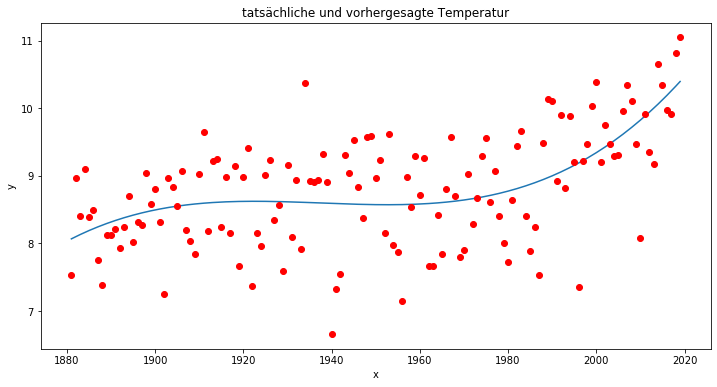

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(x, model.predict(X))
plt.plot(x, y, 'ro') 
plt.title('tatsächliche und vorhergesagte Temperatur')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Wie sieht mithilfe der polynomialen Regression die Vorhersage für das Jahr 2060 aus?